In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
speaknow = pd.read_csv("./SpeakNow_test_data.csv")

In this section we look at the 6 different metrics, and check if they are truly well-defined and meaningful.

* By meaningful, I mean that each metric provides greater insight into assessing a candidate's English abilities.
* By well-defined, I mean that the evaluators understand what each measure is supposed to measure, instead of simply giving high scores across the board or lows scores across the board.

In [90]:
cols = ['pronunciation_avg', 'vocab_avg', 'fluency_avg', 'cohesion_avg', 'grammar_avg', 'cefr_avg']
scores = speaknow[cols].values
U, S, V = np.linalg.svd(scores - scores.mean(0))

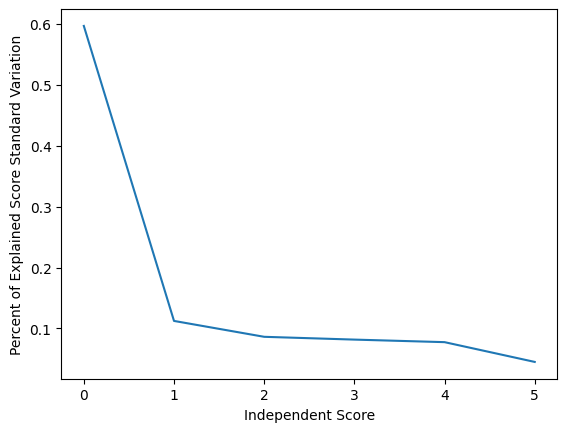

In [95]:
_ = plt.plot(S/S.sum())
_ = plt.xlabel('Independent Score')
_ = plt.ylabel('Percent of Explained Score Standard Variation')

In [92]:
np.exp(-(S/S.sum() * np.log(S/S.sum())).sum())

3.699465563167629

The above measure tells us the entropy/temperature of the variations.

A 3.7 means that on average, that candidates differ vary in scores along ~3.7 independent dimensions.

This means that there is a good indication that the different measures give meaningful information & that the evaluation process does not produce strongly correlated measures.

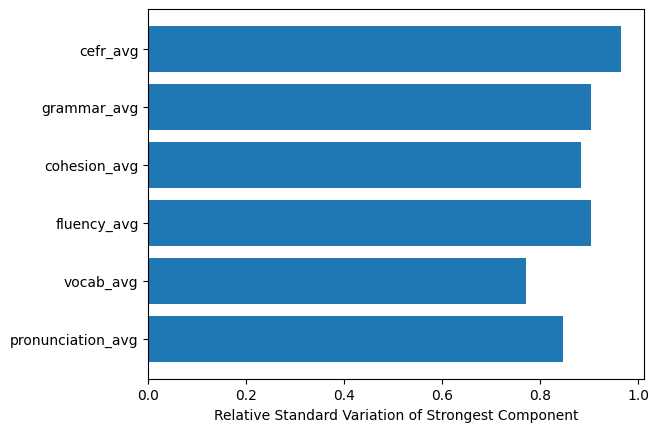

In [94]:
_ = plt.barh(cols, np.sign(V[0, np.argmax(np.abs(V[0]))])*V[0].T*S[0]/np.sqrt(99))
_ = plt.xlabel('Relative Standard Variation of Strongest Component')

This shows the that most of the deviation does happen along all scores, more or less uniformly.

We interpret this to mean that candidates will generally score low --> high on all metrics.

However, they still have slight, yet meaningful, variations in different metrics - fluency, vocabulary, etc... - dependending on their strengths/weaknesses.